In [1]:
import qrcode
from qrcode.image.styledpil import StyledPilImage
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image 
from pathlib import Path

In [ ]:
#qr code generator

In [2]:
filename = 'Shipping details 10.8.23.xlsx'
/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/data/Shipping details 16.8.23.xlsx

In [3]:
path_to_report = '/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/data/' + filename
TEST = False
DISPLAY_QR_CODES = False

In [4]:
img_folder_path = '/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/output_qr_codes/'
pdf_path = '/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/ouput_pdf/qr_codes_' + Path(path_to_report).stem.replace(" ", "_").replace(".", "_")+ '.pdf'
logo_image_path= '/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/data/BD_logo_circle_transparent.png'
column_name_for_unique_ID = 'Name on Frame' # 'Name on Frame' # 'Unnamed: 2' # 'Unnamed: 2' # 'Name on Frame' # 'ID' #
column_name_for_customer_name = 'Customer Name'

In [5]:
global size_dymo_paper_width, resolution_dymo_w
size_dymo_paper_width = 6.2 #cm
resolution_dymo_h = 300 #dpi
resolution_dymo_w = 600 #dpi
url_app_0 = 'https://qr.bd-ops.com/'

In [6]:
df = pd.read_excel(path_to_report, header = 1)
df.head()

,PO Number,Customer Name,Name on Frame,Frame Type,Frame Size,Frame Color,Loups Type,Magnification,WD,Remarks
0,PO 2606,Rex Lian,BD18484,UK Round,M,Graphite,Ergo,x6,560,NaN
1,PO 2606,Ashton Foo,BD18523,UK Rectangular,M,Graphite,Ergo,x6,560,NaN
2,PO 2606,Prashani Rangoda,BD18078,UK Round,XS,Electric Purple,Ergo,x7.5,510,NaN
3,PO 2606,Misagh Eshragi,BD18270,UK Round,L,Royal Navy,Ergo,x7.5,530,NaN
4,PO 2606,Mohanad Abbas,BD18546,UK Rectangular,L,Graphite,Ergo,x7.5,560,NaN


In [7]:
def generate_qr_code(qr_code_message, qr_code_title_top, qr_code_title_bottom, img_folder_path, logo = False):
    qr = qrcode.QRCode(
        version = 2, # from 1 [27x27] to 40 [177x177]
        box_size=30,
        border=1)
    qr.add_data(qr_code_message)
    qr.make()
    plt.clf()
    if logo == True:
        img = qr.make_image(image_factory=StyledPilImage, embeded_image_path= logo_image_path)
    else:
        img = qr.make_image()
    cm = 1/2.54  # centimeters in inches
    plt.figure(figsize=(size_dymo_paper_width*cm, size_dymo_paper_width*cm), dpi=resolution_dymo_w)
    im = img.convert('LA')
    im = plt.imshow(im, cmap='gray')
    xmin, xmax, ymin, ymax = plt.axis()
    im = plt.title(qr_code_title_top,fontsize=15) 
    im = plt.text(s = qr_code_title_bottom, fontsize=30, x = (xmin + xmax)/2, y = ymin - 0.15*(ymax -ymin), horizontalalignment = 'center')
    # 
    im = plt.text(s = '.', fontsize=1, x = xmin, y = ymin, color = 'w')
    im = plt.text(s = '.', fontsize=1, x = xmax, y = ymax, color = 'w')
    im = plt.text(s = '.', fontsize=1, x = xmin, y = ymin - 0.3*(ymax -ymin), color = 'w')
    im = plt.text(s = '.', fontsize=1, x = xmax, y = ymax + 0.3*(ymax -ymin), color = 'w')
    im = plt.text(s = '.', fontsize=1, x = xmin, y = ymax)
    im = plt.text(s = '.', fontsize=1, x = xmax, y = ymin)
    im = plt.text(s = '.', fontsize=1, x = xmin  - 0.3*(xmax -xmin), y = ymax)
    im = plt.text(s = '.', fontsize=1, x = xmax  + 0.3*(xmax -xmin), y = ymin)
    im = plt.axis('off')
    # 
    filename = qr_code_title_top + '_QR_code.jpg'
    # plt.tight_layout(pad=3, h_pad = 3)
    plt.rcParams["figure.figsize"] = (size_dymo_paper_width*cm, size_dymo_paper_width*cm)
    plt.savefig(img_folder_path + filename, transparent  = True, dpi = resolution_dymo_w, bbox_inches = 'tight') #   
    
    return im, filename
    

In [8]:
if TEST == True:
    img_folder_path_test = '/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/output_test/'
    !rm -r {img_folder_path_test+'*'}
    !rm -r {pdf_path+'*'}
    from random import randrange
    range_df = len(df[column_name_for_unique_ID])
    i = randrange(range_df)
    print(i)
    unique_id_temp = str(df[column_name_for_unique_ID].iloc[i])
    customer_name_temp = str(df[column_name_for_customer_name].iloc[i])
    qr_code_message = url_app_0 + '/' + str(unique_id_temp)
    qr_code_title_top = customer_name_temp
    qr_code_title_bottom = unique_id_temp
    # 
    im, filename = generate_qr_code(qr_code_message, qr_code_title_top, qr_code_title_bottom, img_folder_path_test, logo = False)
    #
    # Test CRM Order BD17110
    unique_id_temp = 'BD17110'
    qr_code_message = url_app_0 + '/' + str(unique_id_temp)
    qr_code_title_top = unique_id_temp
    qr_code_title_bottom = 'Test QR Code'
    #
    im, filename = generate_qr_code(qr_code_message, qr_code_title_top, qr_code_title_bottom, img_folder_path_test, logo = False)
    #

In [9]:
# stop!

/var/folders/tl/yx271fpd4sd_d224zzcb65840000gp/T/ipykernel_47979/3400480457.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(size_dymo_paper_width*cm, size_dymo_paper_width*cm), dpi=resolution_dymo_w)


<Figure size 640x480 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

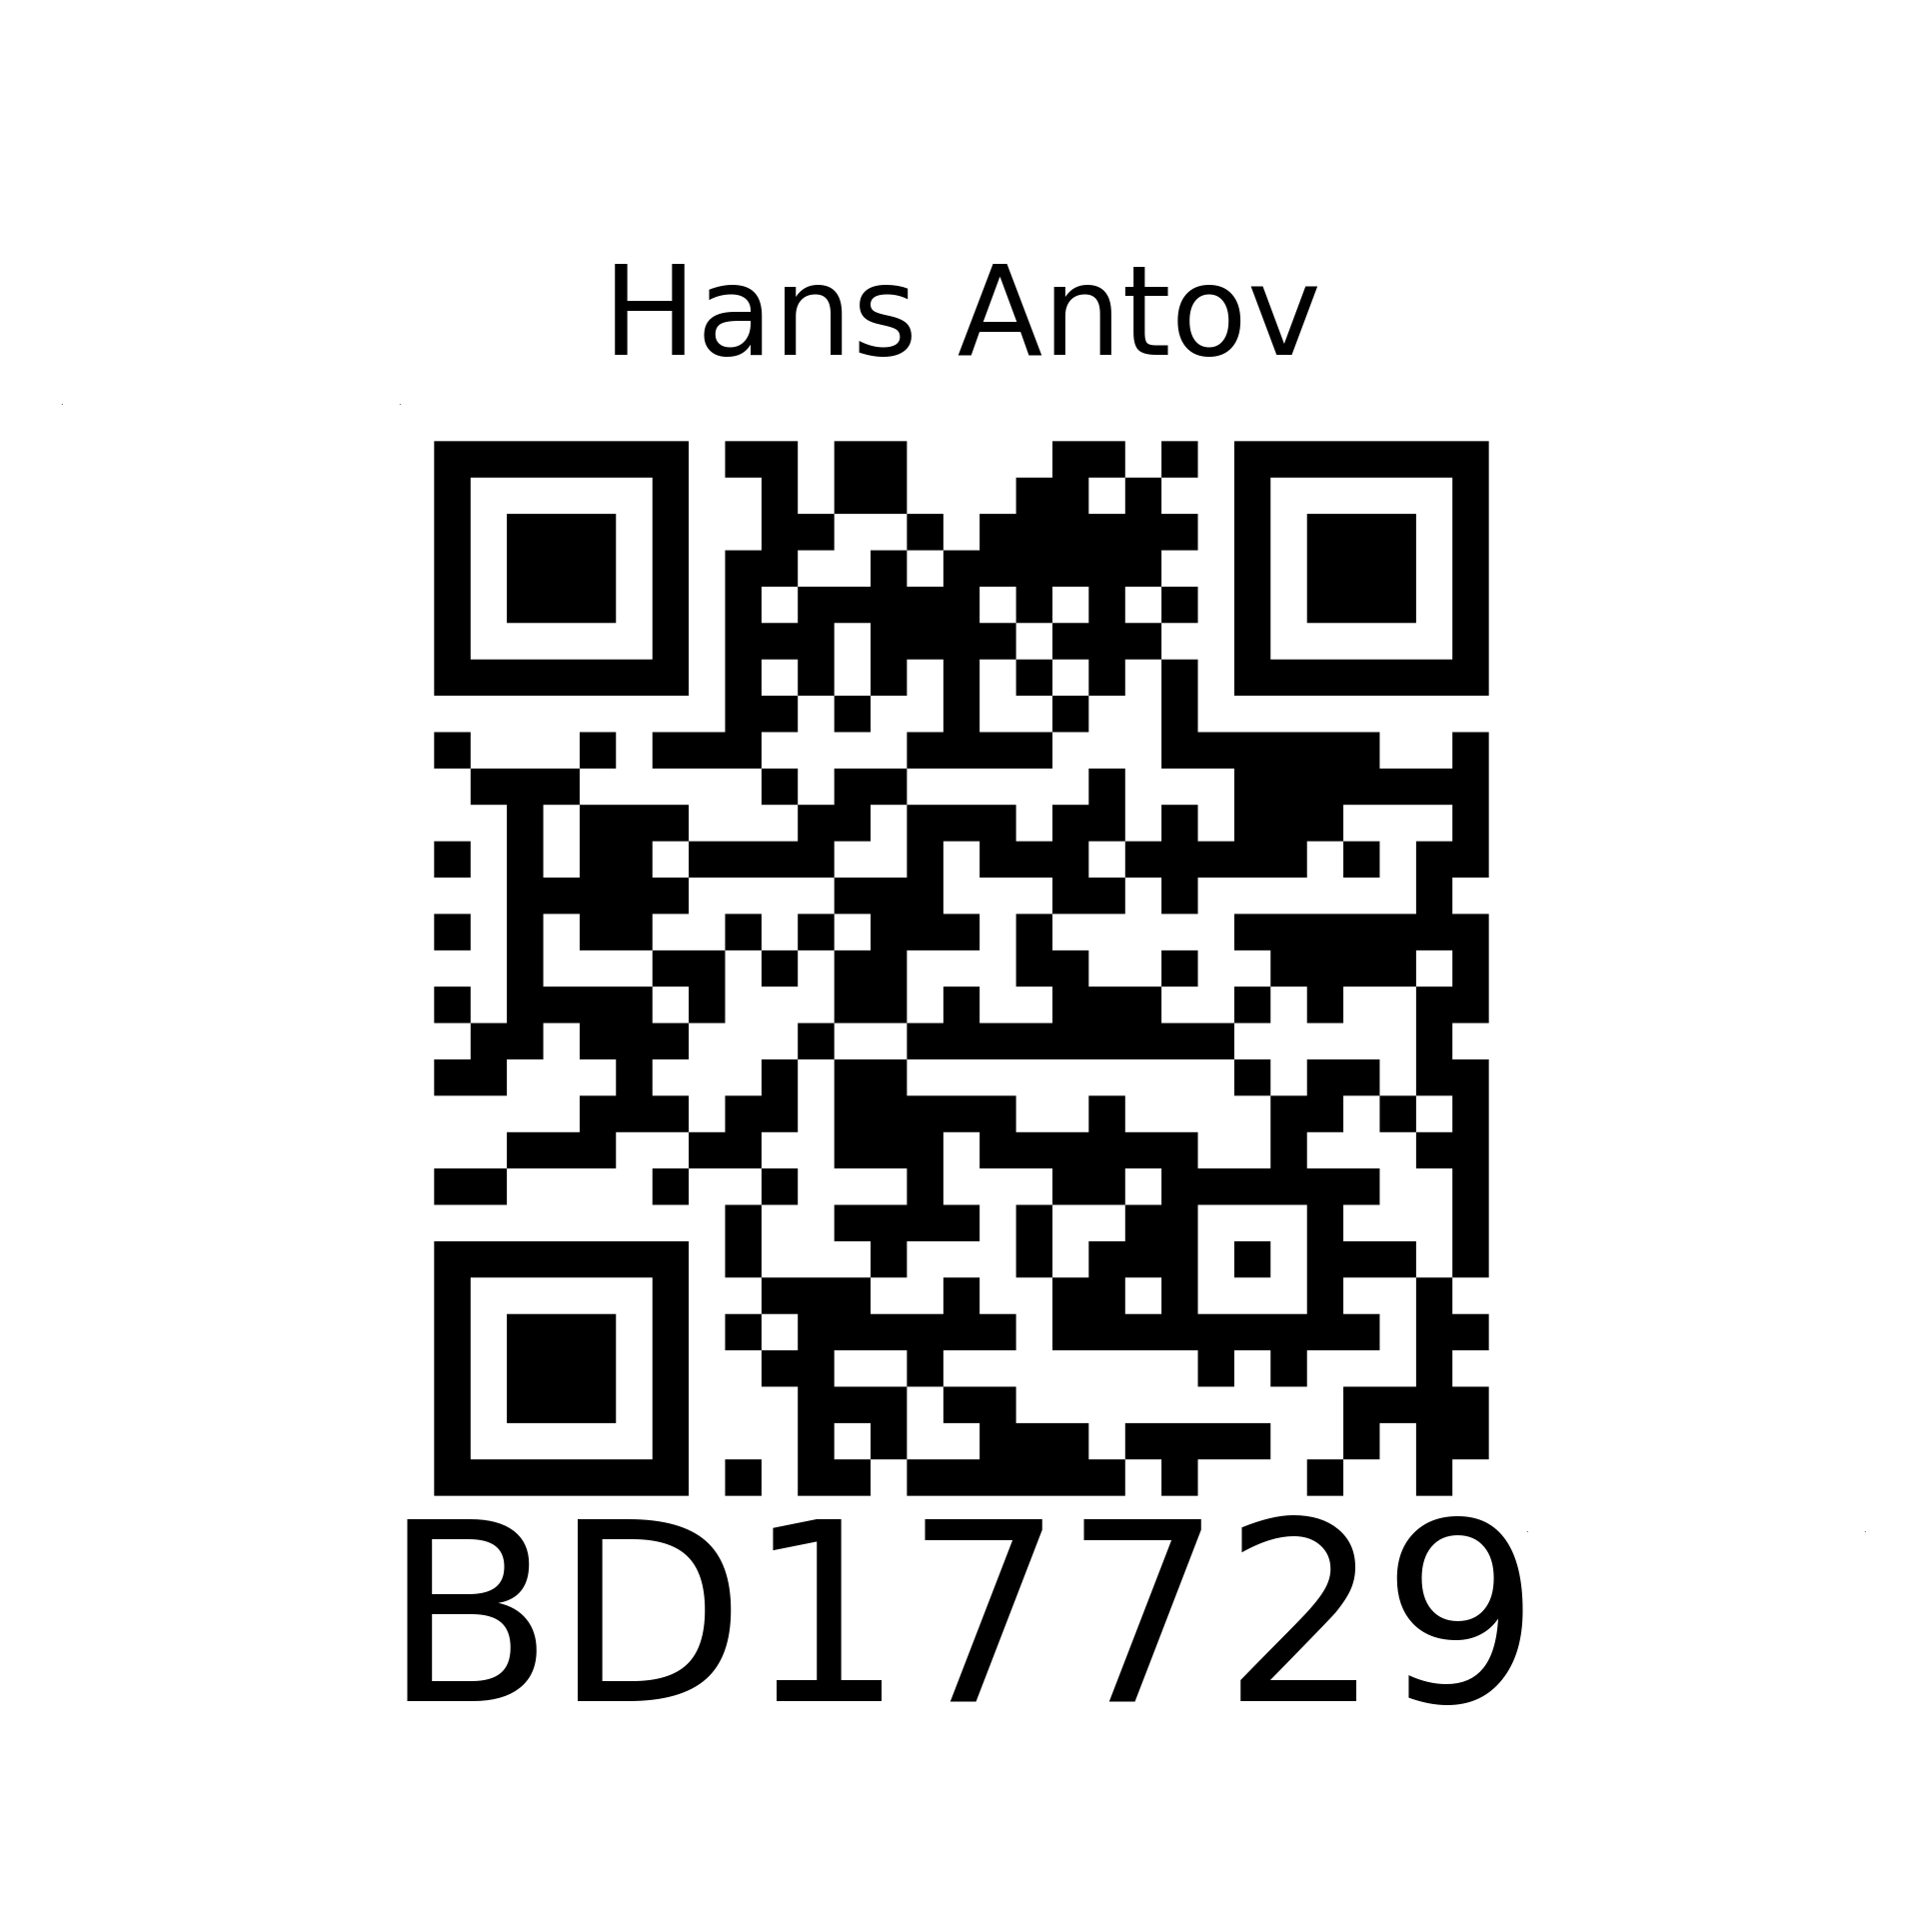

In [10]:
file_name_list = []
!rm -r {img_folder_path+'*'}
for i in range(len(df)):
    unique_id_temp = str(df[column_name_for_unique_ID].iloc[i])
    customer_name_temp = str(df[column_name_for_customer_name].iloc[i])
    if len(unique_id_temp) > 2:
        qr_code_message = url_app_0 + '/' + unique_id_temp
        qr_code_title_top = customer_name_temp
        qr_code_title_bottom = unique_id_temp
        # 
        im, filename = generate_qr_code(qr_code_message, qr_code_title_top, qr_code_title_bottom, img_folder_path, logo = False)
        file_name_list.append(filename)
        if DISPLAY_QR_CODES == True:
            plt.show()

In [11]:
!rm -r {pdf_path+'*'}
images = [Image.open(img_folder_path + f) for f in file_name_list]
images[0].save(pdf_path, "PDF" ,resolution=resolution_dymo_w, save_all=True, append_images=images[1:])

zsh:1: no matches found: /Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/ouput_pdf/qr_codes_Shipping_details_10_8_23.pdf*
